<a href="https://colab.research.google.com/github/ARBasharat/AudioClassification/blob/master/Disaster_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries and Data

Data has been obtained from https://www.kaggle.com/c/nlp-getting-started/overview 

In [1]:
import re, string
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/drive")

train = pd.read_csv("drive/My Drive/Disaster_Tweets/train.csv")
train.drop(columns=['keyword', 'location'], axis=1, inplace=True)
print("Number of Training data points:", len(train))

test = pd.read_csv("drive/My Drive/Disaster_Tweets/test.csv")
test.drop(columns=['keyword', 'location'], axis=1, inplace=True)
print("Number of Test data points:", len(test))

sample_submission = pd.read_csv("drive/My Drive/Disaster_Tweets/sample_submission.csv")

Mounted at /content/drive
Number of Training data points: 7613
Number of Test data points: 3263


In [3]:
train.head(3)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1


# Exploratory Data Analysis

In [4]:
## Remove empty rows
train.dropna(inplace=True)
print("Number of Training data points:", len(train))

test.dropna(inplace=True)
print("Number of Training data points:", len(test))


Number of Training data points: 7613
Number of Training data points: 3263


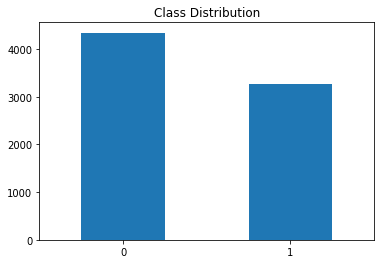

In [5]:
## Class distribution
train['target'].value_counts().plot.bar(rot=0, title= 'Class Distribution', x='Class', y='Frequency')

# NLP - Data processing
##### Here, I will use several NLP techniques to get several useful insights from the data.

In [6]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [8]:
stop_words = nltk.corpus.stopwords.words('english')
lemma = nltk.WordNetLemmatizer()

def clean_text(text):
  ## Make text lowercase, remove punctuation, remove text in square brackets.
  text = str(text).lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = re.sub('\n', '', text)
  text = re.sub('https?://\S|www\.\S', '', text)  # remove urls
  return text

def process_data(text):
  text = clean_text(text)
  text = ' '.join(word for word in text.split() if word not in stop_words)
  text = ' '.join(lemma.lemmatize(word) for word in text.split())
  return text

In [9]:
train['text_cleaned'] = train['text'].apply(process_data)
train.head(3)

,id,text,target,text_cleaned
0,1,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...


In [10]:
test['text_cleaned'] = test['text'].apply(process_data)
test.head(3)

,id,text,text_cleaned
0,0,Just happened a terrible car crash,happened terrible car crash
1,2,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...


#### Look at the word frequency in data

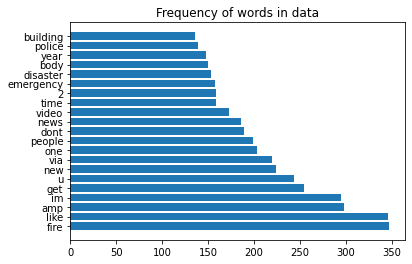

In [11]:
words = [word for sent in train['text_cleaned'] for word in sent.split()]
freq_words = Counter(words)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)

words = []
counts = []
for i in range(0, 21):
  words.append(freq_words_sorted[i][0])
  counts.append(freq_words_sorted[i][1])

plt.figure()
plt.barh(range(0, 21), counts)
plt.yticks(range(0, 21), words[0:21])
plt.title("Frequency of words in data")
plt.show()

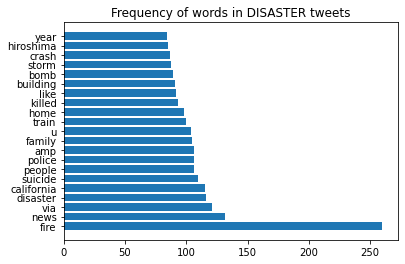

In [12]:
words = [word for sent in train[train['target'] == 1]['text_cleaned'] for word in sent.split()]
freq_words = Counter(words)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)

words = []
counts = []
for i in range(0, 21):
  words.append(freq_words_sorted[i][0])
  counts.append(freq_words_sorted[i][1])

plt.figure()
plt.barh(range(0, 21), counts)
plt.yticks(range(0, 21), words[0:21])
plt.title("Frequency of words in DISASTER tweets")
plt.show()

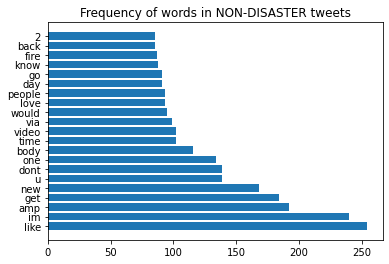

In [13]:
words = [word for sent in train[train['target'] == 0]['text_cleaned'] for word in sent.split()]
freq_words = Counter(words)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)

words = []
counts = []
for i in range(0, 21):
  words.append(freq_words_sorted[i][0])
  counts.append(freq_words_sorted[i][1])

plt.figure()
plt.barh(range(0, 21), counts)
plt.yticks(range(0, 21), words[0:21])
plt.title("Frequency of words in NON-DISASTER tweets")
plt.show()

#### Look at the frequency of bi-grams and tri-grams in data

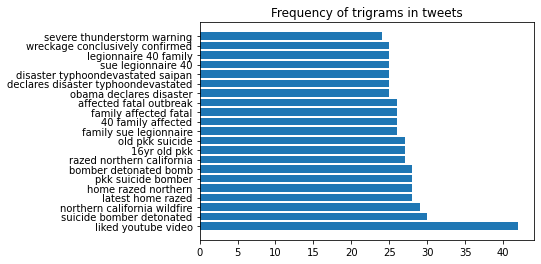

In [14]:
words = [word for sent in train['text_cleaned'] for word in sent.split()]

trigrams = nltk.ngrams(words, 3)
trigrams = (' '.join(g) for g in trigrams)
trigrams = [words for words in trigrams]

freq_words = Counter(trigrams)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)

words = []
counts = []
for i in range(0, 21):
  words.append(freq_words_sorted[i][0])
  counts.append(freq_words_sorted[i][1])

plt.figure()
plt.barh(range(0, 21), counts)
plt.yticks(range(0, 21), words[0:21])
plt.title("Frequency of trigrams in tweets")
plt.show()

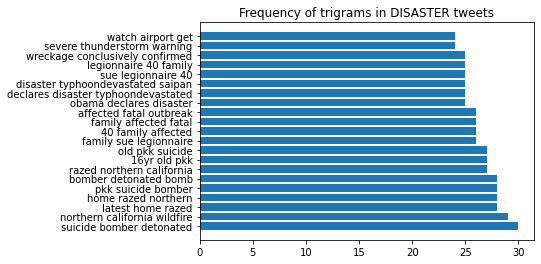

In [15]:
words = [word for sent in train[train['target'] == 1]['text_cleaned'] for word in sent.split()]

trigrams = nltk.ngrams(words, 3)
trigrams = (' '.join(g) for g in trigrams)
trigrams = [words for words in trigrams]

freq_words = Counter(trigrams)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)

words = []
counts = []
for i in range(0, 21):
  words.append(freq_words_sorted[i][0])
  counts.append(freq_words_sorted[i][1])

plt.figure()
plt.barh(range(0, 21), counts)
plt.yticks(range(0, 21), words[0:21])
plt.title("Frequency of trigrams in DISASTER tweets")
plt.show()

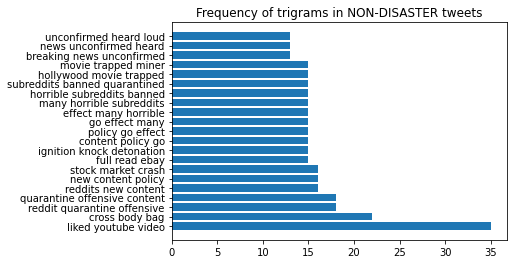

In [16]:
words = [word for sent in train[train['target'] == 0]['text_cleaned'] for word in sent.split()]

trigrams = nltk.ngrams(words, 3)
trigrams = (' '.join(g) for g in trigrams)
trigrams = [words for words in trigrams]

freq_words = Counter(trigrams)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)

words = []
counts = []
for i in range(0, 21):
  words.append(freq_words_sorted[i][0])
  counts.append(freq_words_sorted[i][1])

plt.figure()
plt.barh(range(0, 21), counts)
plt.yticks(range(0, 21), words[0:21])
plt.title("Frequency of trigrams in NON-DISASTER tweets")
plt.show()

# Train model

In [17]:
train_size = 0.8

train_data = train.sample(frac = train_size)
val_data = train.drop(train_data.index)

train_labels = train_data['target']
val_labels = val_data['target']

In [27]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## hyper-parameters
vocab_size = 8000
embedding_dim = 32
max_length = 150
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

## Tokenize the words
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_data['text_cleaned'])

In [28]:
train_sequences = tokenizer.texts_to_sequences(train_data['text_cleaned'])
validation_sequences = tokenizer.texts_to_sequences(val_data['text_cleaned'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print("Length of training and validation sequences before padding are", len(train_sequences[0]), 'and', len(validation_sequences[0]))
print("Length of training and validation sequences after padding are", train_padded.shape[1], 'and', validation_padded.shape[1])

Length of training and validation sequences before padding are 6 and 7
Length of training and validation sequences after padding are 150 and 150


In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          256000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 274,852
Trainable params: 274,852
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, val_labels), verbose=2)

Epoch 1/10
191/191 - 18s - loss: 0.7410 - accuracy: 0.5883 - val_loss: 0.5679 - val_accuracy: 0.7420 - 18s/epoch - 96ms/step
Epoch 2/10
191/191 - 11s - loss: 0.4116 - accuracy: 0.8215 - val_loss: 0.4488 - val_accuracy: 0.7971 - 11s/epoch - 55ms/step
Epoch 3/10
191/191 - 11s - loss: 0.2822 - accuracy: 0.8900 - val_loss: 0.4943 - val_accuracy: 0.7912 - 11s/epoch - 55ms/step
Epoch 4/10
191/191 - 11s - loss: 0.2085 - accuracy: 0.9199 - val_loss: 0.5798 - val_accuracy: 0.7715 - 11s/epoch - 55ms/step
Epoch 5/10
191/191 - 11s - loss: 0.1695 - accuracy: 0.9402 - val_loss: 0.6439 - val_accuracy: 0.7676 - 11s/epoch - 55ms/step
Epoch 6/10
191/191 - 11s - loss: 0.1408 - accuracy: 0.9507 - val_loss: 0.7098 - val_accuracy: 0.7538 - 11s/epoch - 55ms/step
Epoch 7/10
191/191 - 11s - loss: 0.1208 - accuracy: 0.9606 - val_loss: 0.7401 - val_accuracy: 0.7689 - 11s/epoch - 55ms/step
Epoch 8/10
191/191 - 10s - loss: 0.1024 - accuracy: 0.9649 - val_loss: 0.7808 - val_accuracy: 0.7518 - 10s/epoch - 55ms/step


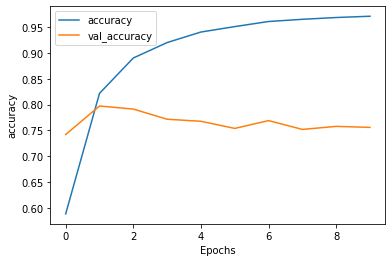

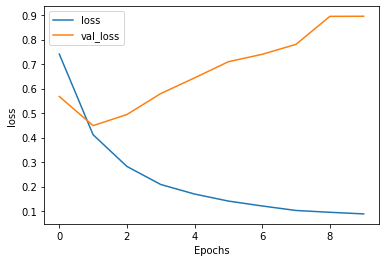

In [31]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = model.predict(validation_padded)
y_pred_bool = np.argmax(predictions, axis=1)

In [40]:
print(classification_report(y_pred_bool, val_labels))

              precision    recall  f1-score   support

           0       0.83      0.76      0.79       919
           1       0.67      0.76      0.71       604

    accuracy                           0.76      1523
   macro avg       0.75      0.76      0.75      1523
weighted avg       0.76      0.76      0.76      1523



In [42]:
test_sequences = tokenizer.texts_to_sequences(test['text_cleaned'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
targets = model.predict(test_padded)
y_target = np.argmax(targets, axis=1)

In [47]:
targets = pd.Series(y_target)
sample_submission['target'] = targets
sample_submission.to_csv('submission.csv', index=False)